In [4]:
import matplotlib
#import matplotlib.pyplot as plt
import networkx as nx
import cv2
import numpy as np
img1 = cv2.imread('roza.jpg', cv2.IMREAD_GRAYSCALE) #чёрно-белый формат
imgb = cv2.imread('roza.jpg', cv2.IMREAD_GRAYSCALE) #чёрно-белый формат
a = img1.shape[0] #ширина
b = img1.shape[1] #высота
print(a, b)
cv2.imwrite('testB.jpg', img1)

800 800


True

In [5]:
def conv(x, h): #медианный фильтр
    X = np.copy(x)
    h = np.flip(h)
    for i in range(len(x)):
        for j in range(len(x[0])):
            row = []
            #print(x[i,j])
            for q in range(-1,2):
                for w in range(-1,2):
                    if h[1+q,1+w] == 0:
                        #print(row)
                        continue
                    elif i+q < 0 or j+w < 0 or i+q>= len(x) or j+w>=len(x[0]):
                        row.append(x[i,j])
                    else:
                        row.append(x[i+q,j+w] * h[1+q,1+w])
            #print(S)
            row.sort()
            #print(row)
            X[i,j] = row[2]
    return X
H = np.array([[0,1,0],[1,1,1],[0,1,0]])
img1 = conv(img1, H)
cv2.imwrite('testMed1.jpg', img1)

True

In [11]:
lsc = cv2.ximgproc.createSuperpixelSLIC(img1, 101, region_size=30, ruler=0.1) #сегментация
lsc.iterate(200)
lsc.enforceLabelConnectivity(5)
Par = np.array([[0, 0, 0]]*lsc.getNumberOfSuperpixels(), dtype=float)
label = lsc.getLabels() #метки сегментации
print(len(Par))

479


In [12]:
for i in range(0, a): #параметризация
    for j in range(0, b):
        n = label[i,j]
        Par[n-1][0] += 1 #количество пикселей
        Par[n-1][1] += img1[i,j] #суммарное значение
        Par[n-1][2] = (Par[n-1][1]/Par[n-1][0]) #матожидание
print(Par)

[[1.17700000e+03 6.08600000e+04 5.17077315e+01]
 [9.49000000e+02 4.61000000e+04 4.85774499e+01]
 [8.49000000e+02 3.50170000e+04 4.12449941e+01]
 ...
 [5.86000000e+02 2.76000000e+04 4.70989761e+01]
 [5.09000000e+02 2.25030000e+04 4.42102161e+01]
 [1.38800000e+03 5.51790000e+04 3.97543228e+01]]


In [13]:
S = np.array([[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]]*len(Par)) #соседи
for i in range(0, a):
    for j in range(0, b-1):
        n1 = label[i,j]
        n2 = label[i, j+1]
        if n1 != n2:
            if n2 not in S[n1]:
                k = 0
                while k != -1:
                    if S[n1][k] == -1:
                        S[n1][k] = n2
                        k = -1
                    elif k == 9:
                        k = -1
                    else:
                        k += 1
            if n1 not in S[n2]:
                k = 0
                while k != -1:
                    if S[n2][k] == -1:
                        S[n2][k] = n1
                        k = -1
                    elif k == 9:
                        k = -1
                    else:
                        k += 1
for j in range(0, b):
    for i in range(0, a-1):
        n1 = label[i,j]
        n2 = label[i+1, j]
        if n1 != n2:
            if n2 not in S[n1]:
                k = 0
                while k != -1:
                    if S[n1][k] == -1:
                        S[n1][k] = n2
                        k = -1
                    elif k == 9:
                        k = -1
                    else:
                        k += 1
            if n1 not in S[n2]:
                k = 0
                while k != -1:
                    if S[n2][k] == -1:
                        S[n2][k] = n1
                        k = -1
                    elif k == 9:
                        k = -1
                    else:
                        k += 1    
print(S)

[[  1  46  47 ...  -1  -1  -1]
 [  0   2  40 ...  -1  -1  -1]
 [  1   3  31 ...  -1  -1  -1]
 ...
 [446 453 450 ...  -1  -1  -1]
 [468 452  -1 ...  -1  -1  -1]
 [444 448 472 ...  -1  -1  -1]]


In [14]:
data = np.zeros(len(Par))
for i in range(len(Par)):
    data[i] = float(Par[i][2])
test = np.array(data)
print(test)

[ 51.70773152  48.57744995  41.24499411  36.03431373  34.10253807
  46.45046924  37.11830635  31.40043526  28.67453294  32.50917431
  33.17032393  31.76476378  35.38879457  44.43882353  29.81490196
  39.62464722  51.71815107  35.11943128  34.06020942  28.79637527
  43.45557851  46.4783237   38.10361446  43.36468647  33.1768559
  34.25205761  33.64611591  63.68602362  56.89033659  53.12673267
  51.41918103  37.77581121  38.14868106  30.05489022  37.6903024
  35.4967033   63.35408163  36.99257426  51.69508197  54.87374302
  38.36319613  29.          30.74772313  35.8377425   36.00839454
  36.84707051  49.18258427  50.780837   235.13368984  36.94306569
  41.73019272  36.74553991  37.19328494 232.39050388  35.31865828
  50.22829582  32.50875486  42.09544008  50.10292813  49.3677639
  41.89533777  50.80384226  36.11671924  46.92139738  44.23521851
 235.11413748  48.73288973 142.67123288  38.28111012  47.78232759
  41.26405622 173.15088283 231.48728246 229.86405767  42.91729323
  40.55321391

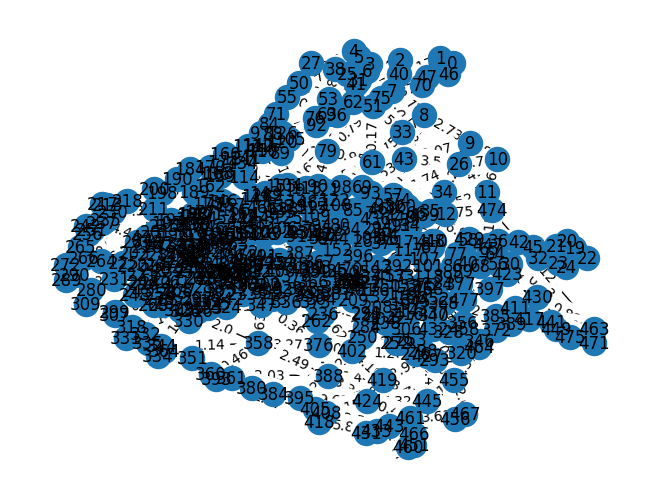

In [15]:
G = nx.Graph()  # создаём объект графа

# определяем список узлов
nodes = np.array([0]*len(test))

for i in range(0, len(nodes)):
    nodes[i] = i
G.add_nodes_from(nodes)
    
for i in range(0, len(S)):
    for j in range(0, 10):
        if S[i,j] != -1 and round((test[i-1] - test[S[i,j] - 1]), 2) >= 0.0:
            G.add_edge(i, S[i,j], weight=round((test[i-1] - test[S[i,j] - 1]), 2))

# рисуем граф и отображаем его
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

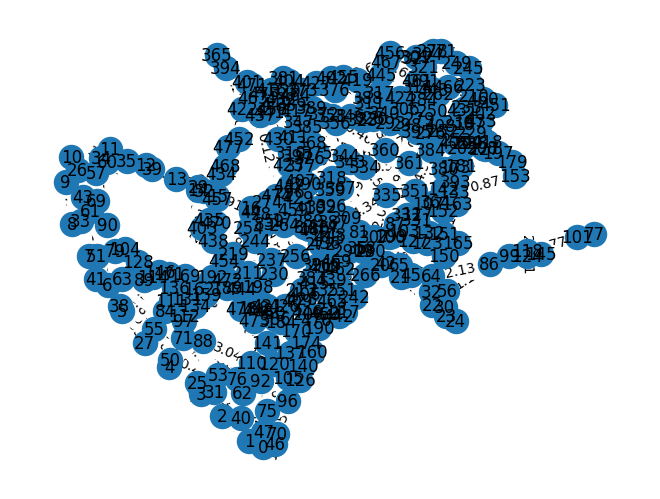

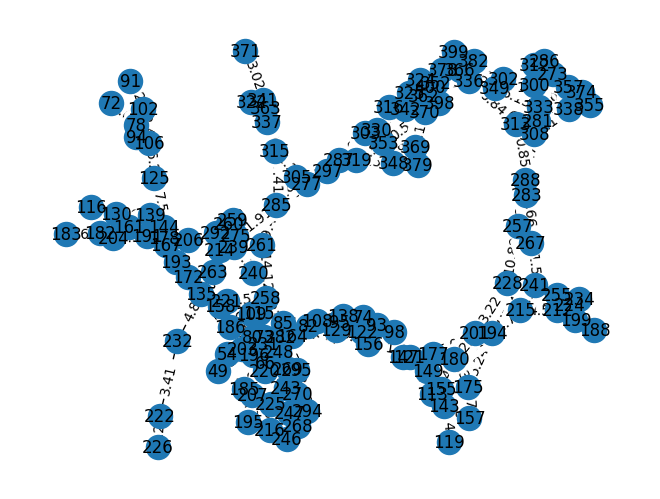

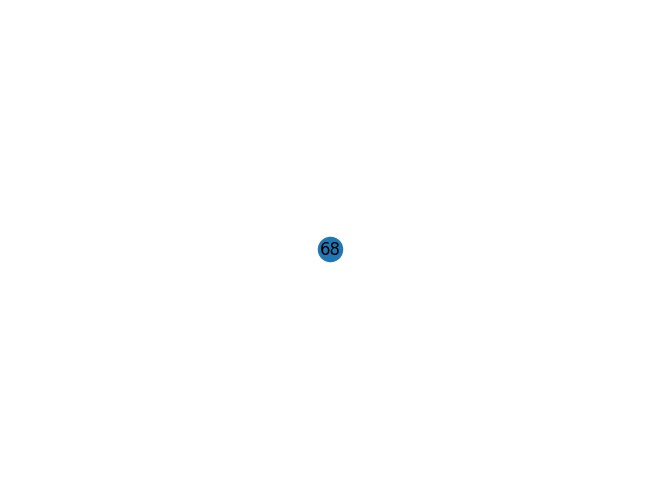

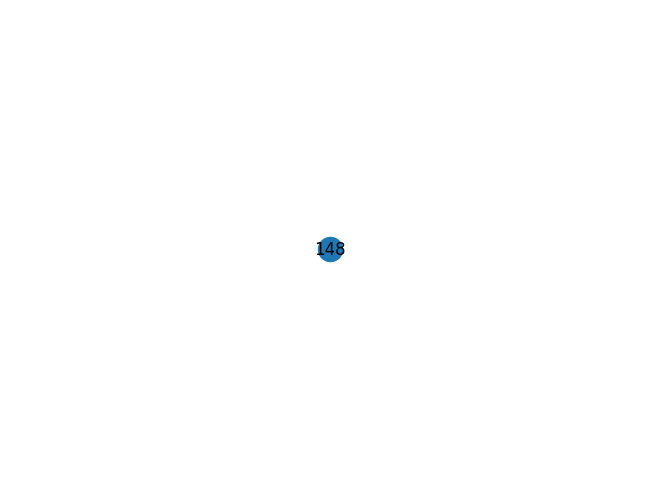

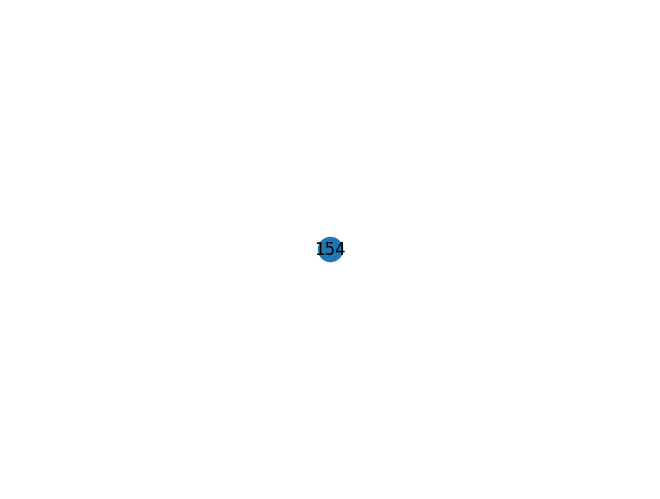

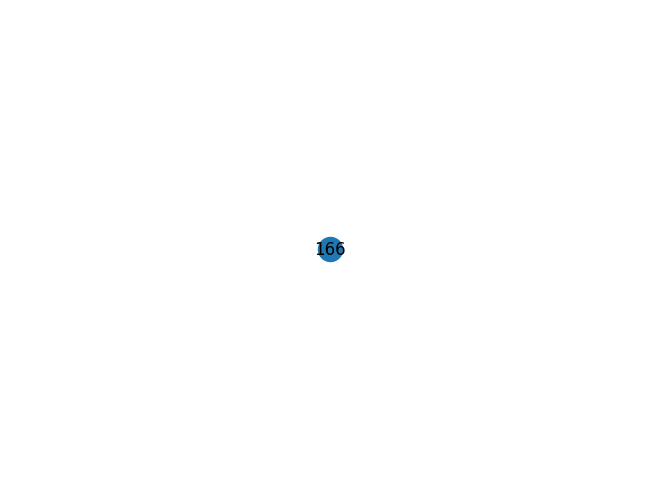

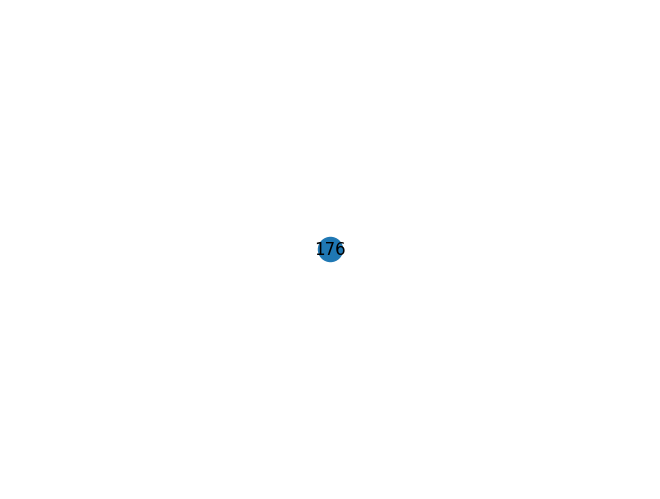

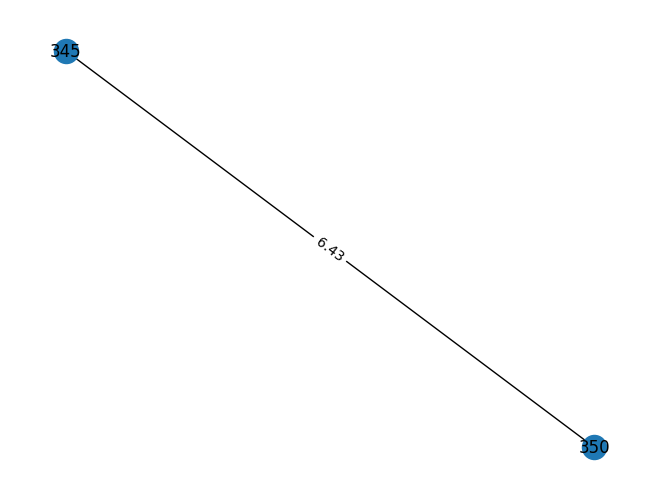

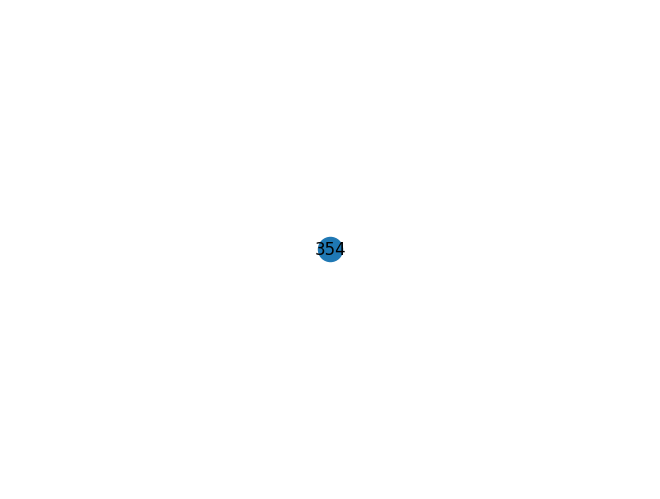

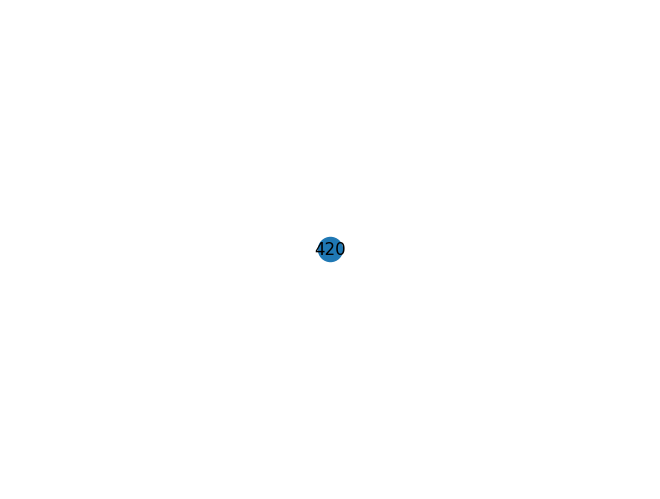

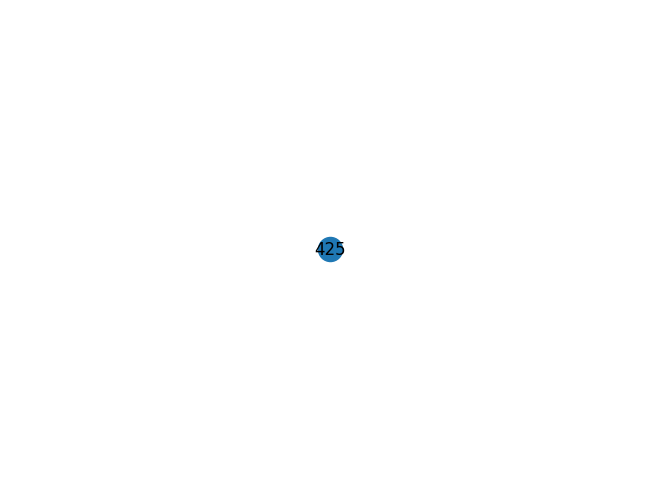

In [16]:
# Make a copy of the graph.
H = G.copy()
Ed = np.array([[0,0]])
nodes = list(H.nodes)
for i in nodes:
    h = list(H.adj[i].keys())
    #print(h)
    for j in range(0, len(h)):
        wt = H.edges[i, h[j]]["weight"]
        #print(wt)
        if wt > 30:
            z = h[j]
            Ed = np.append(Ed, [[i, z]], axis=0)
            H.remove_edge(i, z)
Ed = np.delete(Ed,(0), axis = 0)
subgraphs = [
        H.subgraph(c).copy() for c in nx.connected_components(H.to_undirected())
    ]
for subgraph in subgraphs:
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True)
    labels = nx.get_edge_attributes(subgraph, 'weight')
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

In [17]:
Se = np.array([[-1] * (len(subgraphs) - 1)] * len(subgraphs)) #соседи
for i in range(0, len(subgraphs)):
    for j in range(0, len(subgraphs)):
        if i != j:
            #print(i,j)
            q = list(subgraphs[i].nodes)
            w = list(subgraphs[j].nodes)
            #print(q, w)
            for r in range(0, len(Ed)):
                if (Ed[r][0] in q and Ed[r][1] in w) or (Ed[r][0] in w and Ed[r][1] in q):
                    if j not in Se[i]:
                        k = 0
                        while k != -1:
                            if Se[i][k] == -1:
                                Se[i][k] = j
                                k = -1
                            elif k == 9:
                                k = -1
                            else:
                                k += 1
print(Se)
Pars = np.array([[0,0]]*len(subgraphs), dtype=float) #параметризация подграфов (мат ожидание и кол-во)
for i in range(0, len(subgraphs)):
    n = list(subgraphs[i].nodes)
    Pars[i][1] = len(n)
    for j in range(0, len(Par)):
        if j in n:
            Pars[i][0] += Par[j, 2]
    Pars[i][0] /= Pars[i][1] 
    print(Pars[i])

[[ 1  2  4  5  6  7  8  9 10 -1]
 [ 0  3  4  8  9 10 -1 -1 -1 -1]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  1 -1 -1 -1 -1 -1 -1 -1 -1]]
[ 87.4727792 321.       ]
[110.91616948 148.        ]
[38.28111012  1.        ]
[218.84776903   1.        ]
[238.65982906   1.        ]
[202.49854651   1.        ]
[229.89217759   1.        ]
[42.99973955  2.        ]
[219.0022779   1.       ]
[39.93774319  1.        ]
[56.98711944  1.        ]


In [18]:
q = len(subgraphs)
w = 0
while q != w: #объединяем с ближайшими по мат ожиданию мелкие подграфы
    q = len(subgraphs)
    i = 0
    while i < len(subgraphs):
        n = list(subgraphs[i].nodes)
        m1 = Pars[i][0]
        if len(n) < 100:
            #print(i)
            t = Se[i][0]
            m2 = Pars[t][0]
            sr = np.array([abs(m2 - m1)], dtype=float)
            for j in range(1, len(Se[i])):
                if Se[i][j] != -1:
                    t = Se[i][j]
                    m2 = Pars[t][0]
                    sr = np.append(sr, abs(m1 - m2))
            z = 0
            for y in range(0, len(sr)):
                if sr[z] > sr[y]:
                    z = y
            t = Se[i][z]
            for p in range(0, len(Se)):
                for o in range(0, len(Se[0])):
                    if Se[p][o] == i:
                        if p != t:
                            Se[p][o] = t
                        else:
                            Se[p][o] = -1
                    if Se[p][o] > i:
                        Se[p][o] -= 1
            Se = np.delete(Se,(i), axis = 0)
            Pars[t][0] = (Pars[t][0] * Pars[t][1] + Pars[i][0]*Pars[i][1])/(Pars[t][1] + Pars[i][1])
            Pars[t][1] = (Pars[t][1] + Pars[i][1])
            Pars = np.delete(Pars, (i), axis = 0)
            subgraphs[t].add_nodes_from(n)
            sub = subgraphs[i]
            subgraphs.remove(sub)
            i = len(subgraphs) + 2
        i += 1
    w = len(subgraphs)
print(Pars)
Mid = 0
for i in range(0,len(Pars)-1):
    Mid += Pars[i][1]
Mid /= len(Pars)
print(Mid)

[[ 87.59865336 328.        ]
 [113.19273483 151.        ]]
164.0


In [19]:
while len(subgraphs) > 2:
    M = np.array([[0, 0]]*len(Pars), dtype=float)
    for i in range(len(Pars)):
        s = 256
        for j in range(len(Pars)):
            if i != j and abs(Pars[i][0] - Pars[j][0]) < s:
                s = abs(Pars[i][0] - Pars[j][0])
                M[i][0] = s
                M[i][1] = j
    print(M)
    t = 0
    z = 0
    s = 256
    for i in range(len(M)):
        if M[i][0] < s:
            s = M[i][0]
            t = i
            z = int(M[i][1])
    print(t, z)
    #print(Pars)
    Pars[t][0] = (Pars[t][0] * Pars[t][1] + Pars[z][0]*Pars[z][1])/(Pars[t][1] + Pars[z][1])
    Pars[t][1] = (Pars[t][1] + Pars[z][1])
    #print(Pars)
    Pars = np.delete(Pars, (z), axis = 0)
    #print(Pars)
    subgraphs[t].add_nodes_from(n)
    sub = subgraphs[z]
    subgraphs.remove(sub)
    #print(Se)
    print(Pars)
    Mid = 0
    for i in range(0,len(Pars)):
        Mid += Pars[i][1]
    #Mid /= len(Pars)
    print(Mid)
print(len(subgraphs))

2


In [20]:
col = 0
A = 256/len(subgraphs)
for sub in subgraphs:
    check = list(sub.nodes)
    for i in range(0, a):
        for j in range(0, b):
            n = label[i,j]
            if n in check:
                imgb[i, j] = col
    col += A
cv2.imwrite('test2B.jpg', imgb)

True

In [31]:
imgg = cv2.imread('roza_test.jpg', cv2.IMREAD_GRAYSCALE)
def T(I):
    S = 0
    N = len(I) * len(I[0])
    for i in range(len(I)):
        for j in range(len(I[0])):
            S += I[i,j]
    return 2 * S/N


def Pre(I):
    print(I[0,0], imgg[0,0])
    S = 0
    N = 0
    for i in range(len(I)):
        for j in range(len(I[0])):
            if I[i,j] != 0:
                N += 1
                if imgg[i,j] != 0:
                    S += 1
    print(S)
    print(N)
    return S/N

def Rec(I):
    print(I[0,0], imgg[0,0])
    S = 0
    N = 0
    for i in range(len(I)):
        for j in range(len(I[0])):
            if imgg[i,j] != 0:
                N += 1
                if I[i,j] != 0:
                    S += 1
    print(S)
    print(N)
    return S/N

pr = Pre(imgb)
rec = Rec(imgb)
print('Precision = ', pr)
print('Recall = ', rec)

B = 0.3
Fb = (1 + B**2) * rec * pr/(B**2 * pr + rec)
print('Fb = ', Fb)
print(T(imgb))


0 0
243020
301410
0 0
243020
246281
Precision =  0.806277163995886
Recall =  0.9867590272899656
Fb =  0.8186403850553609
120.564


In [340]:
imgg = cv2.imread('dog_test.jpg', cv2.IMREAD_GRAYSCALE)
def T(I):
    S = 0
    N = len(I) * len(I[0])
    for i in range(len(I)):
        for j in range(len(I[0])):
            S += I[i,j]
    return 2 * S/N


def Pre(I):
    print(I[0,0], imgg[0,0])
    S = 0
    N = 0
    for i in range(len(I)):
        for j in range(len(I[0])):
            if I[i,j] == 0:
                N += 1
                if imgg[i,j] != 0:
                    S += 1
    print(S)
    print(N)
    return S/N

def Rec(I):
    print(I[0,0], imgg[0,0])
    S = 0
    N = 0
    for i in range(len(I)):
        for j in range(len(I[0])):
            if imgg[i,j] != 0:
                N += 1
                if I[i,j] == 0:
                    S += 1
    print(S)
    print(N)
    return S/N

pr = Pre(imgb)
rec = Rec(imgb)
print('Precision = ', pr)
print('Recall = ', rec)

B = 0.3
Fb = (1 + B**2) * rec * pr/(B**2 * pr + rec)
print('Fb = ', Fb)
print(T(imgb))


0 0
33218
143229
0 0
33218
49537
Precision =  0.23192230623686544
Recall =  0.6705694733229707
Fb =  0.2451640232103864
132.00227254281307


In [ ]:
Backg = 0
Max = 0
while len(subgraphs) > 2:
    for i in range(len(Pars)):
        if Pars[i][1] > Max:
            Max = Pars[i][1]
            Backg = i
    i = 0
    while i < len(subgraphs):
        n = list(subgraphs[i].nodes)
        m1 = Pars[i][0]
        if len(n) < 10:
            #print(i)
            t = Se[i][0]
            m2 = Pars[t][0]
            sr = np.array([abs(m2 - m1)], dtype=float)
            for j in range(1, len(Se[i])):
                if Se[i][j] != -1:
                    t = Se[i][j]
                    m2 = Pars[t][0]
                    sr = np.append(sr, abs(m1 - m2))
            z = 0
            for y in range(0, len(sr)):
                if sr[z] > sr[y]:
                    z = y
            t = Se[i][z]
            for p in range(0, len(Se)):
                for o in range(0, len(Se[0])):
                    if Se[p][o] == i:
                        if p != t:
                            Se[p][o] = t
                        else:
                            Se[p][o] = -1
                    if Se[p][o] > i:
                        Se[p][o] -= 1
            Se = np.delete(Se,(i), axis = 0)
            Pars[t][0] = (Pars[t][0] * Pars[t][1] + Pars[i][0]*Pars[i][1])/(Pars[t][1] + Pars[i][1])
            Pars[t][1] = (Pars[t][1] + Pars[i][1])
            Pars = np.delete(Pars, (i), axis = 0)
            subgraphs[t].add_nodes_from(n)
            sub = subgraphs[i]
            subgraphs.remove(sub)
            i = len(subgraphs) + 2
        i += 1
    w = len(subgraphs)
    #print(Se)
    print(Pars)
    Mid = 0
    for i in range(0,len(Pars)):
        Mid += Pars[i][1]
    #Mid /= len(Pars)
    print(Mid)
print(len(subgraphs))

In [394]:
Precision1 =  0.45663013649489714
Recall1 =  0.9868846951499215
Fb1 =  0.4778286901623194

Precision2 =  0.9955274080435094
Recall2 =  0.920264473087978
Fb2 =  0.9888498929848882
print(Precision1 - Precision2)
print(Recall1 - Recall2)
print(Fb1 - Fb2)

-0.003583361705131294
0.016041701809570097
-0.0017490216915525547


In [6]:
#print(max(img1)) Повышение контраста
Xmax = max(max(img1, key=max))
Xmin = min(min(img1, key=min))
print(Xmin, Xmax)
A = 255/(Xmax-Xmin)
B = -255*Xmin/(Xmax-Xmin)
print(A,B)
Ymin = A*Xmin + B
Ymax = A*Xmax + B
print(Ymin, Ymax)
for i in range(a):
    for j in range(b):
        img1[i,j] = A*img1[i,j] + B
print(abs(imgb - img1).sum())
cv2.imwrite('testCon.jpg', img1)

6 195
1.3492063492063493 -8.095238095238095
0.0 255.00000000000003
139994573


True

In [ ]:
i = 0
    while i < len(subgraphs):
        n = list(subgraphs[i].nodes)
        s1 = Pars[i][1]
        if s1 < Max:
            print(Pars, i)
            m1 = Pars[i][0]
            sr = np.array([], dtype=float)
            for j in range(0, len(Pars)):
                if j != i:
                    m2 = Pars[j][0]
                    sr = np.append(sr, abs(m1 - m2))
                if j == i:
                    sr = np.append(sr, Pars[j][0])
            if i == 0:
                z = 1
            else:
                z = 0
            print(sr)
            for y in range(0, len(sr)):
                if sr[z] > sr[y] and z != y and y != i:
                    z = y
            t = z
            print(t, i)
            #print(Pars)
            Pars[t][0] = (Pars[t][0] * Pars[t][1] + Pars[i][0]*Pars[i][1])/(Pars[t][1] + Pars[i][1])
            Pars[t][1] = (Pars[t][1] + Pars[i][1])
            #print(Pars)
            Pars = np.delete(Pars, (i), axis = 0)
            #print(Pars)
            subgraphs[t].add_nodes_from(n)
            sub = subgraphs[i]
            subgraphs.remove(sub)
            i = len(subgraphs) + 2
        i += 1
    #print(Se)